# PySR 符号回归实验：让 AI 发现数学公式

本 Notebook 带你体验**人工智能的数学直觉** —— 让 AI 从数据中自动发现数学公式。

---

## 什么是符号回归？

传统机器学习（如神经网络）会给你一个「黑箱」模型，你知道它能预测，但不知道为什么。

**符号回归**则完全不同：它直接输出一个**数学公式**，比如 $y = x^2 + 2x + 1$。

| 方法 | 输出 | 可解释性 |
|------|------|----------|
| 神经网络 | 一堆权重数字 |  黑箱 |
| 符号回归 | 数学公式 |  完全透明 |

---

## 什么是 PySR？

**PySR** 是目前最强大的开源符号回归工具之一，由剑桥大学开发。它能够：
- 从数据中自动发现数学公式
- 支持自定义运算符（+、-、×、÷、sin、cos、exp 等）
- 找到精度和复杂度之间的最优平衡（Pareto 前沿）

| 特性 | 说明 |
|------|------|
| 算法 | 遗传算法 + 模拟退火 |
| 后端 | Julia（高性能） |
| 接口 | Python（易用） |
| 论文 | arXiv:2305.01582 |

---

## 本实验内容

| 部分 | 内容 | 预计时间 |
|------|------|----------|
| 第一部分 | 环境配置 | 3-5 分钟 |
| 第二部分 | 入门：发现简单公式 | 5 分钟 |
| 第三部分 | 进阶：发现物理定律 | 10 分钟 |
| 第四部分 | 挑战：费曼物理方程 | 15 分钟 |

---

# 第一部分：环境配置

In [ ]:
#@title 1.1 检查运行环境
#@markdown 检查当前 Colab 环境是否满足要求。

import sys
print(" Python 版本:", sys.version.split()[0])
print()

# 检查是否在 Colab 中运行
try:
    import google.colab
    IN_COLAB = True
    print("正在 Google Colab 中运行")
except ImportError:
    IN_COLAB = False
    print("不在 Colab 中，部分功能可能受限")

print()
print("环境检查完成，请继续下一步")

 Python 版本: 3.12.12

正在 Google Colab 中运行

环境检查完成，请继续下一步


In [ ]:
#@title 1.2 安装 PySR
#@markdown 安装 PySR 及其依赖。
#@markdown
#@markdown 预计时间：2-3 分钟（首次运行需要安装 Julia 后端）

print(" 正在安装 PySR，请稍候...")
print("（首次运行会自动安装 Julia，需要几分钟）")
print()

!pip install -q pysr

print()
print(" PySR 安装完成！")

 正在安装 PySR，请稍候...
（首次运行会自动安装 Julia，需要几分钟）

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 12.8 MB/s eta 0:00:00

 PySR 安装完成！


In [ ]:
#@title 1.3 验证安装
#@markdown 导入 PySR 并验证安装是否成功。
#@markdown
#@markdown 首次导入会安装 Julia 依赖，需要 1-2 分钟。

print("正在导入 PySR（首次导入需要安装 Julia 依赖）...")
print()

import numpy as np
from pysr import PySRRegressor

print("验证安装:")
print("-" * 40)
print("NumPy 版本:", np.__version__)
print(" PySR 导入成功")
print("-" * 40)
print()
print("环境配置完成！可以开始实验了。")

import matplotlib.pyplot as plt
import warnings

# 重置字体设置为默认
plt.rcParams['font.family'] = ['DejaVu Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 忽略字体警告
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

正在导入 PySR（首次导入需要安装 Julia 依赖）...

[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia 1.10.3 - 1.11
[juliapkg] Using Julia 1.11.5 at /usr/local/bin/julia
[juliapkg] Using Julia project at /root/.julia/environments/pyjuliapkg
[juliapkg] Writing Project.toml:
           | [deps]
           | SymbolicRegression = "8254be44-1295-4e6a-a16d-46603ac705cb"
           | Serialization = "9e88b42a-f829-5b0c-bbe9-9e923198166b"
           | PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
           | OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
           | 
           | [compat]
           | SymbolicRegression = "~1.11"
           | Serialization = "^1"
           | PythonCall = "=0.9.26"
           | OpenSSL_jll = "~3.0"
[juliapkg] Insta

# 第二部分：入门 —— 发现简单公式

让我们从最简单的例子开始：让 AI 发现 $y = x^2$ 这个公式。

## 思考题

假设你有以下数据：

| x | y |
|---|---|
| 1 | 1 |
| 2 | 4 |
| 3 | 9 |
| 4 | 16 |
| 5 | 25 |

你能看出 $x$ 和 $y$ 之间的关系吗？

**答案**：$y = x^2$

现在，让我们看看 AI 能不能自己发现这个规律！

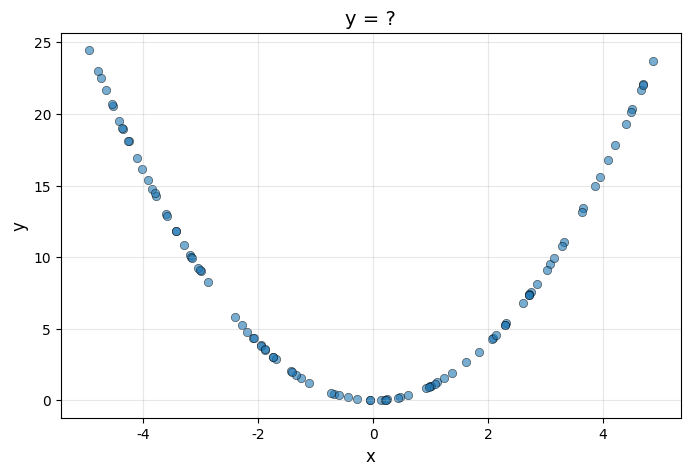

数据分布图：你能看出 x 和 y 的关系吗？

已生成 100 个数据点
   X 范围: [-4.94, 4.87]
   y 范围: [0.00, 24.45]


In [ ]:
#@title 2.1 生成数据
#@markdown 生成符合 $y = x^2$ 关系的数据点。

import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子，保证结果可重复
np.random.seed(42)

# 生成数据：y = x²
X = np.random.uniform(-5, 5, 100).reshape(-1, 1)  # 100个随机点
y = X[:, 0] ** 2  # y = x²

# 可视化数据
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('y = ?', fontsize=14)  # 简单标题，不用中文
plt.grid(True, alpha=0.3)
plt.show()

print("数据分布图：你能看出 x 和 y 的关系吗？")
print()
print(f"已生成 {len(X)} 个数据点")
print(f"   X 范围: [{X.min():.2f}, {X.max():.2f}]")
print(f"   y 范围: [{y.min():.2f}, {y.max():.2f}]")

## 参数说明：PySR 配置

| 参数 | 说明 | 本实验设置 |
|------|------|------------|
| `niterations` | 搜索迭代次数 | 40（越大越慢但越准确） |
| `binary_operators` | 二元运算符 | +, -, *, / |
| `unary_operators` | 一元运算符 | square（平方） |
| `maxsize` | 公式最大复杂度 | 10 |

In [ ]:
#@title 2.2 让 AI 发现公式
#@markdown 运行 PySR，让 AI 从数据中发现数学公式。
#@markdown
#@markdown  预计时间：1-2 分钟

from pysr import PySRRegressor

print("AI 正在分析数据，寻找数学规律...")
print("（这可能需要 1-2 分钟，请耐心等待）")
print()

# 创建模型
model = PySRRegressor(
    niterations=40,           # 迭代次数
    binary_operators=["+", "-", "*", "/"],  # 二元运算符
    unary_operators=["square"],  # 一元运算符：平方
    maxsize=10,               # 公式最大复杂度
    verbosity=0,              # 减少输出信息
    progress=False,           # 不显示进度条
)

# 训练模型
model.fit(X, y)

print("\n" + "="*50)
print("AI 发现的公式：")
print("="*50)
print(model)

AI 正在分析数据，寻找数学规律...
（这可能需要 1-2 分钟，请耐心等待）


AI 发现的公式：
PySRRegressor.equations_ = [
	   pick         score                                equation          loss  \
	0        0.000000e+00                                8.850382  5.502497e+01   
	1  >>>>  3.230673e+01                              square(x0)  5.127721e-13   
	2        5.801805e-07       square(x0) + (x0 * -2.2423013e-8)  5.127709e-13   
	3        1.752891e-01                   x0 / ((x0 / x0) / x0)  4.303247e-13   
	4        3.485740e-08  (x0 / ((x0 / x0) / x0)) - 9.382802e-10  4.303247e-13   
	
	   complexity  
	0           1  
	1           2  
	2           6  
	3           7  
	4           9  
]


In [ ]:
#@title 2.3 查看最佳公式
#@markdown 查看 AI 发现的最佳数学公式。
#@markdown
#@markdown ---
#@markdown ###  评估指标说明
#@markdown
#@markdown | 指标 | 含义 | 越好的值 |
#@markdown |------|------|----------|
#@markdown | **R² 分数** | AI 公式与数据的吻合度 | 越接近 1 越好 |
#@markdown | **均方误差 MSE** | 预测值与真实值的偏差 | 越接近 0 越好 |

print("AI 发现的最佳公式：")
print("-" * 40)
print(f"   {model.sympy()}")
print("-" * 40)
print()

# 验证公式
y_pred = model.predict(X)
error = np.mean((y - y_pred) ** 2)
print(f"均方误差 (MSE): {error:.6f}")

if error < 0.01:
    print("\n太棒了！AI 成功发现了正确的公式！")
else:
    print("\n公式还不够完美，可以尝试增加迭代次数。")

AI 发现的最佳公式：
----------------------------------------
   x0**2
----------------------------------------

均方误差 (MSE): 0.000000

太棒了！AI 成功发现了正确的公式！


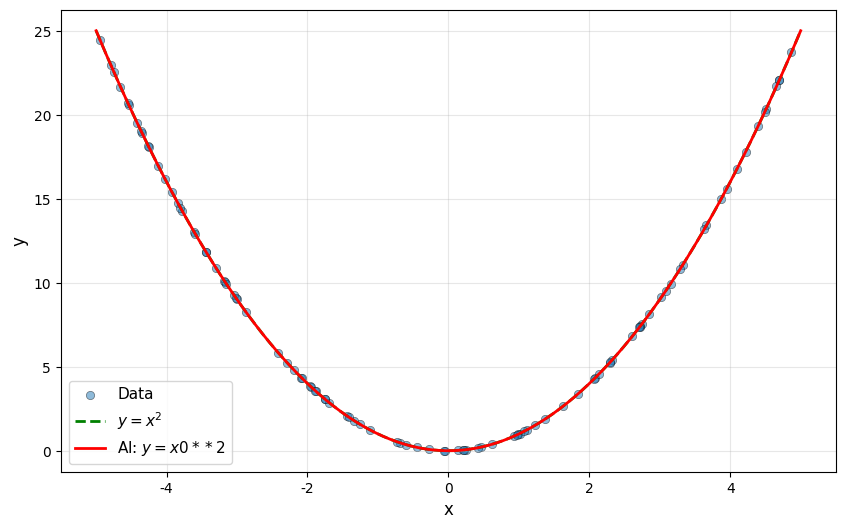

上图对比了 AI 发现的公式与真实公式
   蓝色点 = 原始数据
   绿色虚线 = 真实公式 y = x²
   红色实线 = AI 发现的公式

可视化完成！


In [ ]:
#@title 2.4 可视化结果
#@markdown 对比真实数据和 AI 发现的公式。

import matplotlib.pyplot as plt

# 生成平滑曲线用于绘图
X_plot = np.linspace(-5, 5, 200).reshape(-1, 1)
y_true = X_plot[:, 0] ** 2
y_pred = model.predict(X_plot)

plt.figure(figsize=(10, 6))

# 绘制原始数据点
plt.scatter(X, y, alpha=0.5, label='Data', edgecolors='black', linewidth=0.5)

# 绘制真实函数
plt.plot(X_plot, y_true, 'g--', linewidth=2, label='$y = x^2$')

# 绘制 AI 发现的函数
plt.plot(X_plot, y_pred, 'r-', linewidth=2, label=f'AI: $y = {model.sympy()}$')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("上图对比了 AI 发现的公式与真实公式")
print("   蓝色点 = 原始数据")
print("   绿色虚线 = 真实公式 y = x²")
print("   红色实线 = AI 发现的公式")
print()
print("可视化完成！")

# 第三部分：进阶 —— 发现物理定律

现在让我们挑战更难的任务：让 AI 发现**真实的物理定律**！

## 动能公式

物体的动能公式为：

$$E = \frac{1}{2}mv^2$$

其中：
- $E$ = 动能
- $m$ = 质量
- $v$ = 速度

**挑战**：我们只给 AI 一些「质量、速度、动能」的数据，看看它能不能自己发现这个公式！

In [ ]:
#@title 3.1 生成动能数据
#@markdown 生成符合动能公式 $E = \frac{1}{2}mv^2$ 的数据。

import numpy as np

np.random.seed(123)

# 生成数据
n_samples = 200
m = np.random.uniform(1, 10, n_samples)    # 质量：1-10 kg
v = np.random.uniform(1, 20, n_samples)    # 速度：1-20 m/s
E = 0.5 * m * v ** 2                       # 动能公式

# 组合成特征矩阵
X_physics = np.column_stack([m, v])
y_physics = E

print("数据生成完成：")
print(f"   样本数量: {n_samples}")
print(f"   特征: m（质量）, v（速度）")
print(f"   目标: E（动能）")
print()
print("数据预览（前5行）：")
print(f"{'质量 m':>10} {'速度 v':>10} {'动能 E':>12}")
print("-" * 35)
for i in range(5):
    print(f"{m[i]:>10.2f} {v[i]:>10.2f} {E[i]:>12.2f}")

数据生成完成：
   样本数量: 200
   特征: m（质量）, v（速度）
   目标: E（动能）

数据预览（前5行）：
      质量 m       速度 v         动能 E
-----------------------------------
      7.27      11.31       464.87
      3.58       2.27         9.20
      3.04      13.41       273.65
      5.96      19.93      1183.52
      7.48      15.62       911.75


In [ ]:
#@title 3.2 让 AI 发现动能公式
#@markdown 运行 PySR，看看 AI 能否发现 $E = \frac{1}{2}mv^2$。
#@markdown
#@markdown 预计时间：2-3 分钟

from pysr import PySRRegressor

print(" AI 正在分析物理数据，寻找动能公式...")
print("（这可能需要 2-3 分钟）")
print()

# 创建模型
model_physics = PySRRegressor(
    niterations=50,           # 稍微增加迭代次数
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["square"],
    maxsize=15,
    verbosity=0,
    progress=False,
)

# 训练模型
model_physics.fit(X_physics, y_physics)

print("\n" + "="*50)
print("AI 发现的公式（变量 x0=m, x1=v）：")
print("="*50)
print(model_physics)

 AI 正在分析物理数据，寻找动能公式...
（这可能需要 2-3 分钟）


AI 发现的公式（变量 x0=m, x1=v）：
PySRRegressor.equations_ = [
	   pick      score                                     equation          loss  \
	0         0.000000                                    380.55368  1.564725e+05   
	1         0.057757                                   square(x1)  1.476912e+05   
	2         0.910948                               x1 * 41.902874  5.939298e+04   
	3         0.410165                              square(x0) * x1  3.940967e+04   
	4         0.684858                        (x1 * 7.5628376) * x0  1.986884e+04   
	5  >>>>  30.332109                      (square(x1) * x0) * 0.5  1.333844e-09   
	6         0.044750                       (x0 * (x1 * x1)) * 0.5  1.275470e-09   
	7         0.077611  (x0 * 0.6472772) * (square(x1) * 0.7724666)  1.180223e-09   
	
	   complexity  
	0           1  
	1           2  
	2           3  
	3           4  
	4           5  
	5           6  
	6           7  
	7           8  
]


In [ ]:
#@title 3.3 解读结果
#@markdown 查看 AI 发现的最佳公式，并与真实动能公式对比。
#@markdown
#@markdown ---
#@markdown ### 评估指标说明
#@markdown
#@markdown | 指标 | 含义 | 越好的值 |
#@markdown |------|------|----------|
#@markdown | **R² 分数** | AI 公式与数据的吻合度 | 越接近 1 越好 |
#@markdown | **均方误差 MSE** | 预测值与真实值的偏差 | 越接近 0 越好 |

print("结果分析：")
print("=" * 50)
print()
print(f" 真实公式:     E = 0.5 * m * v²")
print(f" AI 发现的公式: E = {model_physics.sympy()}")
print()

# 计算误差
y_pred_physics = model_physics.predict(X_physics)
mse = np.mean((y_physics - y_pred_physics) ** 2)
r2 = 1 - np.sum((y_physics - y_pred_physics)**2) / np.sum((y_physics - np.mean(y_physics))**2)

print(f"模型评估：")
print(f"   均方误差 (MSE): {mse:.6f}")
print(f"   R² 分数: {r2:.6f}")
print()

if r2 > 0.99:
    print("太棒了！AI 成功发现了动能公式！")
    print("   （注意：x0 代表质量 m，x1 代表速度 v）")
else:
    print("公式可能还不够准确，可以尝试增加迭代次数。")

结果分析：

 真实公式:     E = 0.5 * m * v²
 AI 发现的公式: E = x1**2*x0*0.5

模型评估：
   均方误差 (MSE): 0.000000
   R² 分数: 1.000000

太棒了！AI 成功发现了动能公式！
   （注意：x0 代表质量 m，x1 代表速度 v）


# 第四部分：挑战 —— 费曼物理方程

现在来挑战真正的物理学家级别的任务！

我们将使用著名的**费曼物理讲义**中的方程数据。这些方程曾被用来测试 AI 符号回归系统的能力。

## 万有引力公式

$$F = G \frac{m_1 m_2}{r^2}$$

其中：
- $F$ = 引力
- $G$ = 引力常数（这里简化为 1）
- $m_1, m_2$ = 两个物体的质量
- $r$ = 两物体之间的距离

In [ ]:
#@title 4.1 生成万有引力数据
#@markdown 生成符合万有引力公式的数据。

import numpy as np

np.random.seed(456)

# 生成数据
n_samples = 300
m1 = np.random.uniform(1, 100, n_samples)   # 质量1
m2 = np.random.uniform(1, 100, n_samples)   # 质量2
r = np.random.uniform(1, 50, n_samples)     # 距离（避免太小导致除法问题）

# 万有引力公式（G=1 简化）
F = (m1 * m2) / (r ** 2)

# 组合特征
X_gravity = np.column_stack([m1, m2, r])
y_gravity = F

print(" 万有引力数据生成完成：")
print(f"   样本数量: {n_samples}")
print(f"   特征: m1（质量1）, m2（质量2）, r（距离）")
print(f"   目标: F（引力）")
print()
print("数据预览（前5行）：")
print(f"{'m1':>10} {'m2':>10} {'r':>10} {'F':>12}")
print("-" * 45)
for i in range(5):
    print(f"{m1[i]:>10.2f} {m2[i]:>10.2f} {r[i]:>10.2f} {F[i]:>12.4f}")

 万有引力数据生成完成：
   样本数量: 300
   特征: m1（质量1）, m2（质量2）, r（距离）
   目标: F（引力）

数据预览（前5行）：
        m1         m2          r            F
---------------------------------------------
     25.63      84.35      25.54       3.3148
     17.14      76.26      28.63       1.5944
     78.58      68.76       1.16    4018.8874
     81.04      38.40       1.52    1343.1798
     62.94      19.27      14.08       6.1130


In [ ]:
#@title 4.2 让 AI 发现万有引力公式
#@markdown 这是一个更复杂的公式，AI 需要发现除法和平方的组合。
#@markdown
#@markdown 预计时间：3-5 分钟

from pysr import PySRRegressor

print("AI 正在寻找万有引力公式...")
print("（这是一个更难的挑战，可能需要 3-5 分钟）")
print()

# 创建模型
model_gravity = PySRRegressor(
    niterations=60,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["square", "inv(x) = 1/x"],  # 添加平方和倒数
    extra_sympy_mappings={"inv": lambda x: 1/x},
    maxsize=20,
    verbosity=0,
    progress=False,
)

# 训练模型
model_gravity.fit(X_gravity, y_gravity)

print("\n" + "="*60)
print("AI 发现的公式（x0=m1, x1=m2, x2=r）：")
print("="*60)
print(model_gravity)

AI 正在寻找万有引力公式...
（这是一个更难的挑战，可能需要 3-5 分钟）


AI 发现的公式（x0=m1, x1=m2, x2=r）：
PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                           85.48067   
	1         0.455793                                       1600.15 / x2   
	2         0.384823                              2711.191 / square(x2)   
	3         0.148632                            square(x1 / square(x2))   
	4        31.707723                             (x0 / square(x2)) * x1   
	5         0.210190                              x0 * ((x1 / x2) / x2)   
	6         0.272457             x1 * ((x0 + 3.584992e-6) / square(x2))   
	7         0.024561                      ((x1 / x2) / x2) * (x0 * 1.0)   
	8         0.004881     x1 * ((x0 + (2.3022183e-6 / x2)) / square(x2))   
	9  >>>>   0.446816  ((x0 * ((x1 / x2) * -0.48528308)) / x2) * -2.0...   
	
	           loss  complexity  
	0  1.239764e+05           1  
	1  4.982439e+04    

In [ ]:
#@title 4.3 结果对比
#@markdown 将 AI 发现的公式与牛顿万有引力定律对比。
#@markdown
#@markdown ---
#@markdown ### 评估指标说明
#@markdown
#@markdown | 指标 | 含义 | 越好的值 |
#@markdown |------|------|----------|
#@markdown | **R² 分数** | AI 公式与数据的吻合度 | 越接近 1 越好 |
#@markdown | **均方误差 MSE** | 预测值与真实值的偏差 | 越接近 0 越好 |

print("万有引力公式发现结果：")
print("=" * 60)
print()
print("牛顿万有引力定律: F = m1 * m2 / r²")
print(f"AI 发现的公式:    F = {model_gravity.sympy()}")
print()

# 评估
y_pred_gravity = model_gravity.predict(X_gravity)
mse = np.mean((y_gravity - y_pred_gravity) ** 2)
r2 = 1 - np.sum((y_gravity - y_pred_gravity)**2) / np.sum((y_gravity - np.mean(y_gravity))**2)

print(f"模型评估：")
print(f"   均方误差 (MSE): {mse:.6f}")
print(f"   R² 分数: {r2:.6f}")
print()

if r2 > 0.99:
    print("恭喜！AI 成功发现了牛顿的万有引力定律！")
    print("   这个公式被人类用了几百年，AI 只用几分钟就发现了！")
else:
    print("结果还不够完美，但已经很接近了！")

万有引力公式发现结果：

牛顿万有引力定律: F = m1 * m2 / r²
AI 发现的公式:    F = x0*x1*(-0.48528308)*(-2.060653)/(x2*x2)

模型评估：
   均方误差 (MSE): 0.000000
   R² 分数: 1.000000

恭喜！AI 成功发现了牛顿的万有引力定律！
   这个公式被人类用了几百年，AI 只用几分钟就发现了！


# 第五部分：自由探索

现在轮到你了！试试让 AI 发现其他数学公式。

## 💡 探索建议

| 公式 | 数学表达式 | 难度 |
|------|------------|------|
| 圆的面积 | $A = \pi r^2$ | ⭐ 简单 |
| 三角函数 | $y = \sin(x)$ | ⭐⭐ 中等 |
| 理想气体定律 | $PV = nRT$ | ⭐⭐⭐ 困难 |
| 爱因斯坦质能方程 | $E = mc^2$ | ⭐⭐ 中等 |

实验配置
   目标公式: sin(x)
   数据点数: 150
   数据范围: [0.1, 10]
   迭代次数: 40



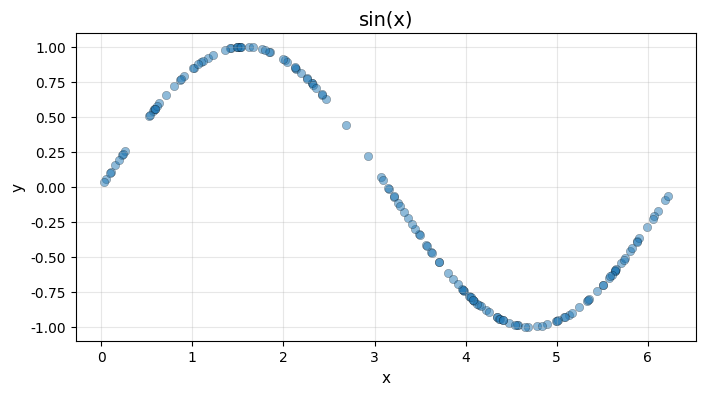

上图展示了数据的分布情况
   横轴: x，纵轴: y

AI 正在寻找公式，请稍候...

结果对比
真实公式: sin(x)
AI 发现:  sin(x0)

模型评估:
   均方误差 (MSE): 0.000000
   R² 分数: 1.000000



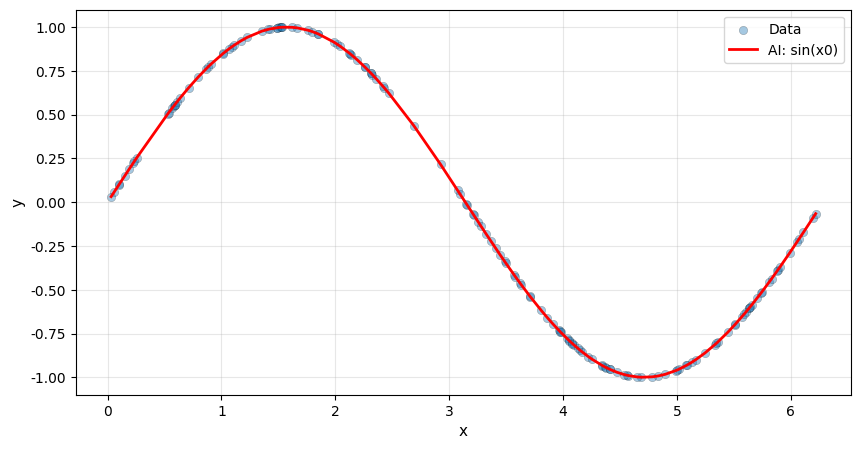

上图对比了 AI 发现的公式与真实数据
   蓝色点 = 原始数据
   红色线 = AI 发现的公式

完美！AI 精确发现了公式！


In [ ]:
#@title 5.1 自定义实验 - 修改下面的代码来探索其他公式！
#@markdown 你可以修改数据生成部分来测试不同的数学关系。


#@markdown ---
#@markdown ### 选择要发现的公式：
formula_type = "球的体积 V = (4/3)πr³" #@param ["圆的面积 A = π × r²", "球的体积 V = (4/3)πr³", "平方关系 y = x²", "立方关系 y = x³", "正弦函数 y = sin(x)", "爱因斯坦质能方程 E = mc²", "自定义公式"]

#@markdown ---
#@markdown ### 自定义公式（仅当上方选择"自定义公式"时生效）
#@markdown 格式示例：`x**2 + 2*x + 1` 或 `np.sin(x) * x`
custom_formula = "x**2 + 3*x + 2" #@param {type:"string"}

#@markdown ---
#@markdown ### 搜索设置
#@markdown
#@markdown | 参数 | 说明 | 建议 |
#@markdown |------|------|------|
#@markdown | **迭代次数** | AI 搜索公式的轮数，越大越准但越慢 | 简单公式 20-40，复杂公式 60-100 |
#@markdown | **数据点数** | 生成多少个数据点供 AI 学习 | 一般 100-200 即可 |
#@markdown
n_iterations = 40 #@param {type:"slider", min:20, max:100, step:10}
n_samples = 150 #@param {type:"slider", min:50, max:300, step:50}

#@markdown ---
#@markdown ### 数据范围
#@markdown
#@markdown 设置变量 x 的最小值和最大值，AI 将在这个范围内生成数据点。
#@markdown
#@markdown | 公式类型 | 建议范围 | 原因 |
#@markdown |----------|----------|------|
#@markdown | 圆的面积、平方/立方 | 0.1 ~ 10 | 避免 0 导致的计算问题 |
#@markdown | 正弦函数 | 0 ~ 6.28 | 覆盖完整周期（0 到 2π） |
#@markdown | 自定义公式 | 根据需要调整 | 确保公式在该范围内有意义 |
#@markdown
x_min = 0.1 #@param {type:"number"}
x_max = 10 #@param {type:"number"}

# ========== 以下是执行代码 ==========

import numpy as np
from pysr import PySRRegressor
import matplotlib.pyplot as plt

np.random.seed(42)

# 根据选择生成数据
x = np.random.uniform(x_min, x_max, n_samples)

if formula_type == "圆的面积 A = π × r²":
    y = np.pi * x ** 2
    true_formula = "π × r²"
    x_label = "r"
    y_label = "A"

elif formula_type == "球的体积 V = (4/3)πr³":
    y = (4/3) * np.pi * x ** 3
    true_formula = "(4/3) × π × r³"
    x_label = "r"
    y_label = "V"

elif formula_type == "平方关系 y = x²":
    y = x ** 2
    true_formula = "x²"
    x_label = "x"
    y_label = "y"

elif formula_type == "立方关系 y = x³":
    y = x ** 3
    true_formula = "x³"
    x_label = "x"
    y_label = "y"

elif formula_type == "正弦函数 y = sin(x)":
    x = np.random.uniform(0, 6.28, n_samples)
    y = np.sin(x)
    true_formula = "sin(x)"
    x_label = "x"
    y_label = "y"

elif formula_type == "爱因斯坦质能方程 E = mc²":
    c = 3e8
    y = x * (c ** 2) / 1e16
    true_formula = "m × c²"
    x_label = "m"
    y_label = "E"

else:
    # 自定义公式
    try:
        y = eval(custom_formula)
        true_formula = custom_formula
        x_label = "x"
        y_label = "y"
    except Exception as e:
        print(f"公式错误: {e}")
        print("请检查你的公式格式！")
        print("提示：使用 x 作为变量，支持 np.sin(), np.cos(), np.exp(), ** 等")
        raise

X_custom = x.reshape(-1, 1)

# 显示设置
print("="*50)
print("实验配置")
print("="*50)
print(f"   目标公式: {true_formula}")
print(f"   数据点数: {n_samples}")
print(f"   数据范围: [{x_min}, {x_max}]")
print(f"   迭代次数: {n_iterations}")
print("="*50)
print()

# 绘制原始数据
plt.figure(figsize=(8, 4))
plt.scatter(x, y, alpha=0.5, edgecolors='black', linewidth=0.3)
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.title(f'{true_formula}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print("上图展示了数据的分布情况")
print(f"   横轴: {x_label}，纵轴: {y_label}")
print()

print("AI 正在寻找公式，请稍候...")
print()

# 根据公式类型选择运算符
if "sin" in formula_type.lower() or "sin" in custom_formula.lower():
    unary_ops = ["sin", "cos", "square"]
elif "³" in formula_type or "cube" in custom_formula.lower() or "**3" in custom_formula:
    unary_ops = ["square", "cube"]
else:
    unary_ops = ["square"]

model_custom = PySRRegressor(
    niterations=n_iterations,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=unary_ops,
    maxsize=15,
    verbosity=0,
    progress=False,
)

model_custom.fit(X_custom, y)

# 结果展示
print("="*50)
print("结果对比")
print("="*50)
print(f"真实公式: {true_formula}")
print(f"AI 发现:  {model_custom.sympy()}")
print("="*50)
print()

# 评估
y_pred = model_custom.predict(X_custom)
mse = np.mean((y - y_pred) ** 2)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

print(f"模型评估:")
print(f"   均方误差 (MSE): {mse:.6f}")
print(f"   R² 分数: {r2:.6f}")
print()

# 可视化对比
plt.figure(figsize=(10, 5))

sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_sorted = y[sort_idx]
y_pred_sorted = y_pred[sort_idx]

plt.scatter(x, y, alpha=0.4, label='Data', edgecolors='black', linewidth=0.3)
plt.plot(x_sorted, y_pred_sorted, 'r-', linewidth=2, label=f'AI: {model_custom.sympy()}')
plt.xlabel(x_label, fontsize=11)
plt.ylabel(y_label, fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print("上图对比了 AI 发现的公式与真实数据")
print("   蓝色点 = 原始数据")
print("   红色线 = AI 发现的公式")
print()

# 结论
if r2 > 0.999:
    print("完美！AI 精确发现了公式！")
elif r2 > 0.99:
    print("太棒了！AI 成功发现了公式！")
elif r2 > 0.9:
    print("不错！可以尝试增加迭代次数来提高准确度。")
else:
    print("提示：可以尝试增加迭代次数或调整数据范围。")

#  实验总结

## 今天你学到了什么？

1. **符号回归**是一种让 AI 自动发现数学公式的技术
2. **PySR** 是一个强大的开源符号回归工具
3. AI 可以从数据中发现物理定律，比如：
   - 平方关系：$y = x^2$

   - 动能公式：$E = \frac{1}{2}mv^2$

   - 万有引力：$F = \frac{m_1 m_2}{r^2}$

## 思考题

1. AI「发现」的公式和人类科学家发现的公式有什么区别？
2. 符号回归的局限性是什么？它不能发现什么样的规律？
3. 如果数据有噪声（误差），AI 还能发现正确的公式吗？

## 延伸阅读

- [PySR 官方文档](https://github.com/MilesCranmer/PySR?tab=readme-ov-file)
- [PySR 论文 (arXiv:2305.01582)](https://arxiv.org/abs/2305.01582)
- [费曼模型](https://github.com/SJ001/AI-Feynman?tab=readme-ov-file)
- [费曼符号回归数据库](https://space.mit.edu/home/tegmark/aifeynman.html)

---

**恭喜完成实验！** 你已经体验了 AI 的「数学直觉」！